In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow import keras


In [35]:
(train_data, train_label), (test_data, test_label) = keras.datasets.fashion_mnist.load_data()

In [36]:
type(train_data)
train_data[:10]
train_data.shape
np.max(train_data[1])
print(np.unique(train_label))

[0 1 2 3 4 5 6 7 8 9]


In [37]:
# 표준화 정규화작업
train_data = train_data/255.0
test_data = test_data/255.0
train_scaled, test_scaled, train_label, test_label = train_test_split(train_data, train_label)

In [38]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dropout(0.3))  # 뉴런의 개수를 30% 삭제 
model.add(keras.layers.Dense(10, activation='softmax'))

In [39]:
# 딥러닝 설정 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [40]:
# 콜백 
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb =  keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [41]:
# history = model.fit(train_scaled, train_label, epochs=20, validation_data=(test_scaled, test_label), callbacks=[checkpoint_cb, early_stopping_cb])
history = model.fit(train_scaled, train_label, epochs=20, validation_data=(test_scaled, test_label))

Epoch 1/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.5270 - accuracy: 0.8170 - val_loss: 0.4240 - val_accuracy: 0.8515
Epoch 2/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3996 - accuracy: 0.8572 - val_loss: 0.3934 - val_accuracy: 0.8600
Epoch 3/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3591 - accuracy: 0.8712 - val_loss: 0.3667 - val_accuracy: 0.8691
Epoch 4/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3292 - accuracy: 0.8808 - val_loss: 0.3753 - val_accuracy: 0.8604
Epoch 5/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3109 - accuracy: 0.8872 - val_loss: 0.3439 - val_accuracy: 0.8725
Epoch 6/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2961 - accuracy: 0.8904 - val_loss: 0.3327 - val_accuracy: 0.8791
Epoch 7/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2816 - accuracy: 0.8955 - val_loss: 0.3241 - val_accuracy:

In [42]:
# 정확도 
score = model.evaluate(test_scaled, test_label)
score

469/469 [==============================] - 0s 830us/step - loss: 0.3425 - accuracy: 0.8879


[0.3424971401691437, 0.8879333138465881]

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

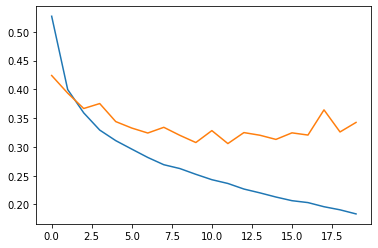

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

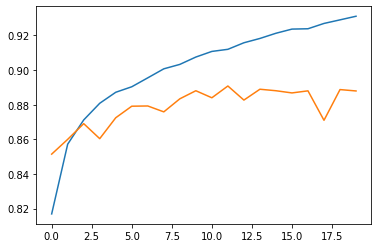

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()